In [58]:
import numpy as np
import matplotlib.pyplot as plt
G = 1
m = 1

In [145]:
def dvdt(pos, n_dim):
    
    M = len(pos)
    
    a = np.zeros((M//n_dim, M//n_dim, n_dim))
    
    for i in range(M//n_dim):
        
        for j in range(i + 1, M//n_dim):
                    
            r2 = 1e-3
            
            for k in range(n_dim):
                
                r2 += (pos[j * n_dim + k] - pos[i * n_dim + k])**2
            
            
            constant = -G* m * r2**(-3/2)
            
            for k in range(n_dim):
                
                F = constant * (pos[i * n_dim + k]- pos[j * n_dim + k])
                
                a[i, j ,k] = F
                a[j, i, k] = -F
                
    #a_tot = a.sum(axis=1)
    a_tot = np.zeros(pos.shape) 
    
    for i in range(M//n_dim): 
        
        for k in range(n_dim):
        
            for j in range(M//n_dim):
                
                a_tot[i * n_dim + k] += a[i, j ,k]
    
    return a_tot

In [146]:
def get_next_step(Y, n_dim, dt):
    
    N = len(Y)
    
    M = N//2
    pos = Y[:M]
    vel = Y[M:]
    
    pos_new = pos + vel * dt
    
    a_tot = dvdt(pos_new, n_dim)
    
    vel_new = vel + a_tot * dt
    
    res = np.empty(Y.shape)
    res[:M] = pos_new
    res[M:] = vel_new
    return res

In [147]:
pos = [-1,0, 1,0]
vini = 0.1
vel = [0,-vini, 0,vini]

N_t = 1030


Y = np.zeros((2 * len(pos), N_t))

Y[:4, 0] = pos
Y[4:, 0] = vel

for i in range(1,N_t):
    
    Y[:, i] = get_next_step(Y[:, i - 1], 2, 0.01)

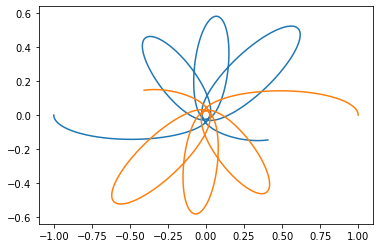

In [148]:
plt.plot(Y[0, :], Y[1, :])
plt.plot(Y[2, :], Y[3, :])